In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1reCBidpAaci6CZnZOxfZHvWO_VMNK93W -O tmp.zip
!unzip -q tmp.zip && rm tmp.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1reCBidpAaci6CZnZOxfZHvWO_VMNK93W
To: /content/tmp.zip
100% 1.41M/1.41M [00:00<00:00, 116MB/s]


In [ ]:
consumption=pd.read_csv("powerconsumption.csv")

In [ ]:
consumption['Datetime'] = pd.to_datetime(consumption['Datetime'])
consumption.set_index('Datetime', inplace=True)

In [ ]:
consumption

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [ ]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows',
            'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
df=consumption.copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [ ]:
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)

anomaly_score = lof.fit_predict(scaled_data)

df['anomaly_score'] = anomaly_score

df.loc[df['anomaly_score'] == -1, 'anomaly_score'] = 0

df.loc[df['anomaly_score'] == 1, 'anomaly_score'] = 1
print(df.groupby('anomaly_score').size())

anomaly_score
0     2621
1    49795
dtype: int64


In [ ]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,anomaly_score
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,1
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,1
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,1


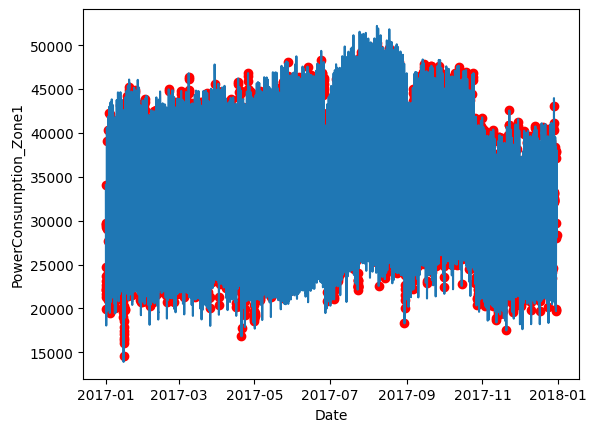

In [ ]:
plt.plot(df.index, df['PowerConsumption_Zone1'])
plt.scatter(df.index[df['anomaly_score'] == 0], df['PowerConsumption_Zone1'][df['anomaly_score'] == 0], c='red')
plt.xlabel('Date')
plt.ylabel('PowerConsumption_Zone1')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

In [ ]:
params = {
    'n_neighbors': [3,5,7,10,20],
    'contamination': [0.03]
}
lof=LocalOutlierFactor()
grid_search = GridSearchCV(estimator=lof, param_grid=params,scoring=silhouette_score, n_jobs=-1, cv=5)

grid_search.fit(scaled_data)

best_params = grid_search.best_params_

print(best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


{'contamination': 0.03, 'n_neighbors': 3}


In [ ]:
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.03)

anomaly_score = lof.fit_predict(scaled_data)

df['anomaly_score'] = anomaly_score

df.loc[df['anomaly_score'] == -1, 'anomaly_score'] = 0

df.loc[df['anomaly_score'] == 1, 'anomaly_score'] = 1

print(df.groupby('anomaly_score').size())

anomaly_score
0     1573
1    50843
dtype: int64


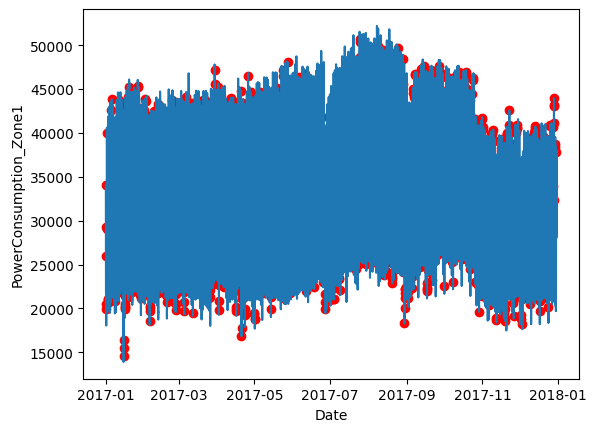

In [ ]:
plt.plot(df.index, df['PowerConsumption_Zone1'])
plt.scatter(df.index[df['anomaly_score'] == 0], df['PowerConsumption_Zone1'][df['anomaly_score'] == 0], c='red')
plt.xlabel('Date')
plt.ylabel('PowerConsumption_Zone1')
plt.show()


In [ ]:
import joblib

In [ ]:
model_filename = 'local_outlier_factor.joblib'
joblib.dump(lof, model_filename)

['local_outlier_factor.joblib']